In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.default_rng(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

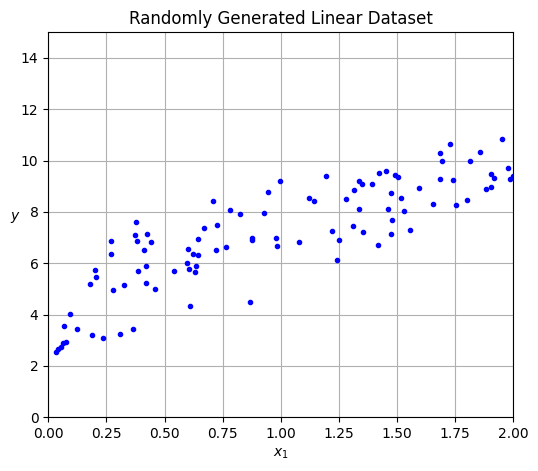

In [3]:
plt.figure(figsize=(6, 5))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Randomly Generated Linear Dataset")
plt.axis([0,2,0,15])
plt.grid()
plt.show()

Normalize Equation for fitting Line

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta

array([[4.23886377],
       [2.95923864]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta
y_predict

array([[ 4.23886377],
       [10.15734106]])

Visual this prediction

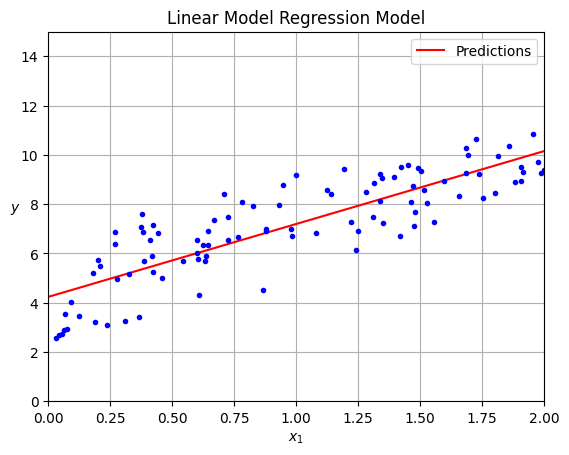

In [7]:
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Linear Model Regression Model")
plt.grid()
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg.intercept_, linear_reg.coef_

(array([4.23886377]), array([[2.95923864]]))

In [9]:
linear_reg.predict(X_new)

array([[ 4.23886377],
       [10.15734106]])

Linear Regression is class based function of scipy.linalg.lstsq(), stands for "Least Squares"

In [10]:
# This is as:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.23886377],
       [2.95923864]])

# Gradient Descent
## Batch Gradient Descent

* Gradient vector of cost function
* Gradient descent step

In [11]:
eta = 0.1 # Learning Rate
n_epochs = 1000
m = len(X_b) # number of instances 

np.random.default_rng(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.23886377],
       [2.95923864]])

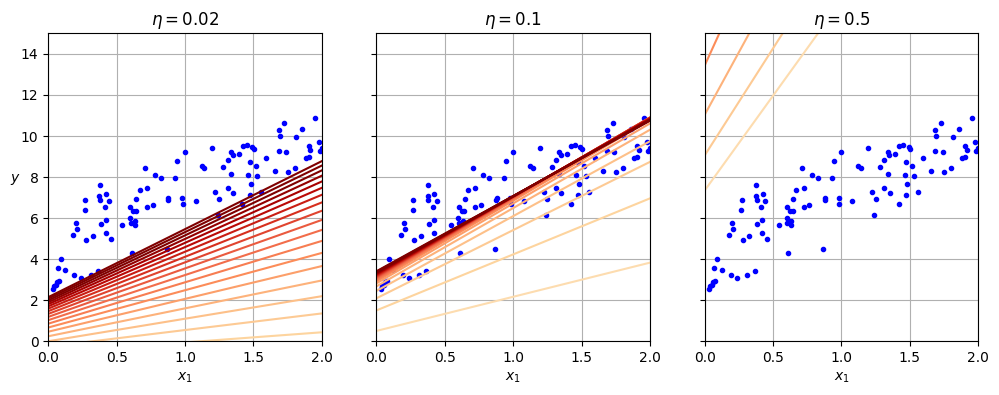

In [13]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta 
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color, linestyle='solid')
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0,2,0,15])
    plt.grid()
    plt.title(fr'$\eta= {eta}$')
    return theta_path

np.random.default_rng(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)

plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plt.gca().yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()


In [14]:
theta_path_sgd = []

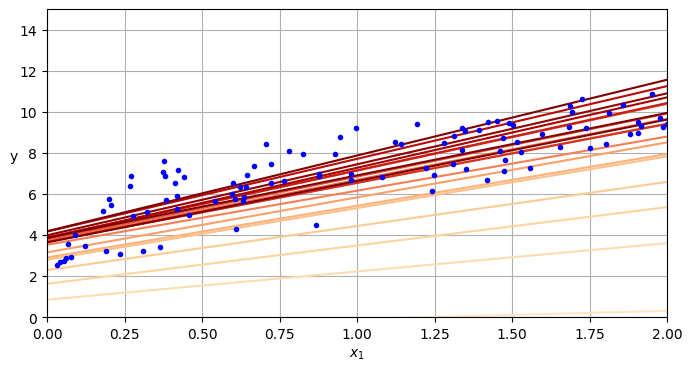

In [15]:
n_epochs = 50
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t + t1)

n_shown = 20
plt.figure(figsize=(8, 4))

np.random.default_rng(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # SGD does not requires division of m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.show()

In [16]:
theta

array([[4.32118325],
       [2.88995789]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(
    max_iter=1000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=42,
)

sgd_regressor.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [18]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.23731727]), array([2.9583809]))

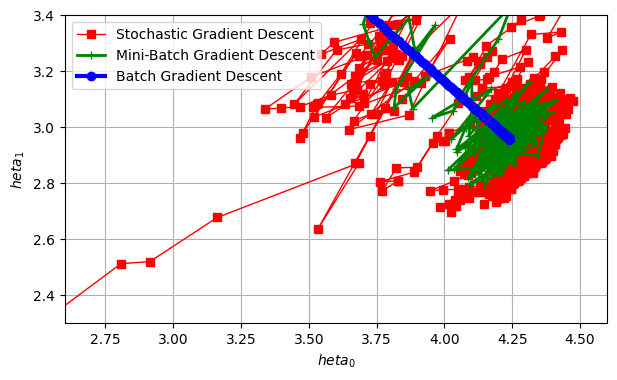

In [19]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.default_rng(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)


theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(
    theta_path_sgd[:, 0],
    theta_path_sgd[:, 1],
    "r-s",
    linewidth=1,
    label="Stochastic Gradient Descent",
)
plt.plot(
    theta_path_mgd[:, 0],
    theta_path_mgd[:, 1],
    "g-+",
    linewidth=2,
    label="Mini-Batch Gradient Descent",
)
plt.plot(
    theta_path_bgd[:, 0],
    theta_path_bgd[:, 1],
    "b-o",
    linewidth=3,
    label="Batch Gradient Descent",
)


plt.legend(loc="upper left")
plt.xlabel("$\theta_0$")
plt.ylabel("$\theta_1$")
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

## Polynomial Regression

In [35]:
# Generating Non-Linear Data:
np.random.default_rng(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [37]:
X

array([[ 0.09833918],
       [-0.91700837],
       [ 2.92562353],
       [-0.63434666],
       [-1.55819541],
       [-0.7950317 ],
       [-1.15101729],
       [ 0.66582876],
       [-2.45231473],
       [ 1.65357747],
       [ 2.45532626],
       [-2.98471   ],
       [ 1.47095157],
       [ 2.2201099 ],
       [-0.29001124],
       [-1.97622363],
       [ 0.01165757],
       [ 1.63634482],
       [ 0.85810191],
       [-0.98434427],
       [ 2.72552904],
       [-0.00764622],
       [ 1.73600098],
       [-2.30098081],
       [-2.86307444],
       [ 1.16036327],
       [-2.25166811],
       [-2.62706266],
       [-0.70558013],
       [ 1.16296594],
       [ 2.93597522],
       [-2.27297333],
       [ 0.44015935],
       [ 1.46080956],
       [-1.12896539],
       [ 2.60241569],
       [ 0.66531076],
       [-1.62027943],
       [-2.31296945],
       [-0.45512311],
       [ 0.1396894 ],
       [ 0.13843164],
       [ 1.22460714],
       [ 1.82767777],
       [-0.45276335],
       [-2

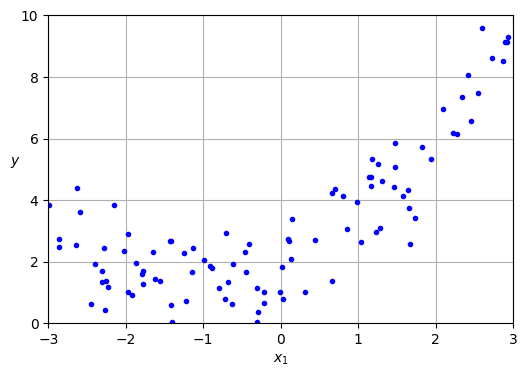

In [64]:
plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.axis([-3,3,0,10])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [50]:
X[0]

array([0.09833918])

In [51]:
X_poly[0]

array([0.09833918, 0.00967059])

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
lin_reg.intercept_, lin_reg.coef_

(array([1.91537038]), array([[1.06899047, 0.49467029]]))

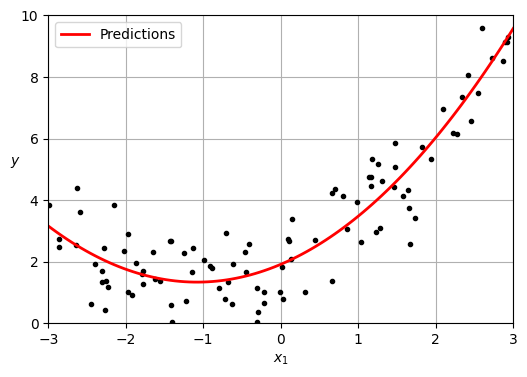

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6,4))
plt.plot(X, y, 'k.')
plt.plot(X_new, y_new, '-', linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend()
plt.show()